# Face Recognition with Eigenfaces

You are provided a dataset of 40 persons with 10 example images each. 

* Split the dataset into training and testing set. For each person, select 7 images randomly for training, and the other 3 for testing.
* Compute the "mean face" from the training images and display it.
* Using PCA library function, compute first 10 "eigenfaces" and display them
* Project all images onto the space of 10-dimensional eigenfaces
*  Predict the class labels of the test images using 
    * 5-NN
    * Decision Tree
    * Naive Bayes
*  Calculate precision, recall, f-score of each class based on your predictions.(Implement these yourself)

Recall(x) = $\frac{predicted = x \& true = x}{True = x}$  
Precision(x) = $\frac{predicted = x \& true = x}{Predicted = x}$  
F-Score(x) = $\frac{2}{\frac{1}{Precision(x)} + \frac{1}{Recall(x)}}$



## Importing libraries and loading data

In [1]:
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
dataset = fetch_olivetti_faces(shuffle=False)
faces = dataset.data

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\ayush\scikit_learn_data


In [3]:
n_images, n_features = faces.shape

In [4]:
faces[0].shape

(4096,)

In [5]:
len(faces)

400

In [153]:
# centering images
faces = (faces - faces.mean())/ faces.std()

In [154]:
y = [j for j in range(0, 40) for i in range(0, 10)]

In [155]:
# Splitting data into train and test set
X_train = []
X_test = []
y_train = []
y_test = []
for i in range(0, 40):
    X_train_, X_test_, y_train_, y_test_ = train_test_split(faces[i*10: i*10 + 10], y[i*10:i*10 + 10], test_size=0.30, random_state=23)
    X_test.extend(X_test_)
    X_train.extend(X_train_)
    y_train.extend(y_train_)
    y_test.extend(y_test_)
                            

In [156]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
y_train = np.array(y_train)

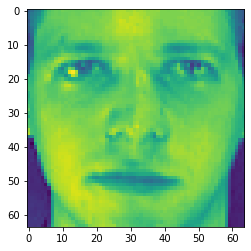

In [157]:
temp = faces[0].reshape(64, 64)
plt.imshow(temp)

## Mean Image

In [158]:
mean_image = np.mean(X_train, axis = 0)

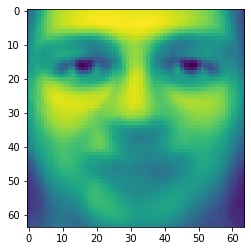

In [159]:
plt.imshow(mean_image.reshape(64, 64))

## Eigenfaces

In [160]:
pca = PCA(n_components=256)

In [161]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=256, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

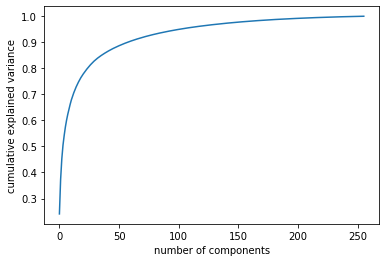

In [162]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()


In [163]:
pca = PCA(n_components=10)

In [164]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [165]:
pca.components_.shape

(10, 4096)

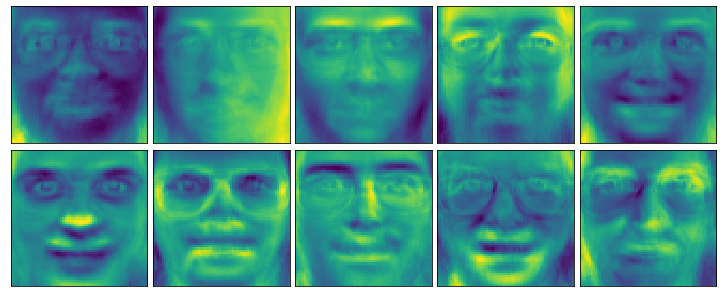

In [166]:
# Plotting Eigenfaces
plt.figure(figsize=(2. * 5, 2.26 * 2))
plt.suptitle("", size=16)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(pca.components_[i].reshape(64, 64))
    plt.xticks(())
    plt.yticks(())
plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

### Project all images onto the space of 10-dimensional eigenfaces

In [167]:
# Reducing dimensions, choosing only 10 features from 4096 features
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [168]:
X_train_pca.shape

(280, 10)

In [169]:
y_train.shape

(280,)

## Precision, Recall and F-score

In [170]:
from collections import Counter


def precision(y, y_pred):
    '''
    Takes two 1 dimensional array/vector, expected values and predicted values respectively
    and return precision
    '''
    counter = Counter(y)
    tp = dict()
    for i in range(len(y)):
        if y[i] == y_pred[i]:
            if y[i] in tp:
                tp[y[i]] += 1
            else:
                tp[y[i]] = 1
    prec = []
    for x in counter:
        try:
            prec.append(tp[x]/counter[x])
        except:
            prec.append(0)
    prec = np.array(prec)
    return np.mean(prec)

def recall(y, y_pred):
    '''
    Takes two 1 dimensional array/vector, expected values and predicted values respectively
    and return recall
    '''
    counter = Counter(y_pred)
    tp = dict()
    for i in range(len(y)):
        if y[i] == y_pred[i]:
            if y[i] in tp:
                tp[y[i]] += 1
            else:
                tp[y[i]] = 1
    rec = []
    for x in counter:
        try:
            rec.append(tp[x]/counter[x])
        except:
            rec.append(0)
    rec = np.array(rec)
    return np.mean(rec)
    

def f_score(y, y_pred):
    '''
    Takes two 1 dimensional array/vector, expected values and predicted values respectively
    and return f_score
    '''
    prec = precision(y, y_pred)
    rec = recall(y, y_pred)
    f_sc = (2*prec*rec)/(prec + rec)
    return f_sc
    

## Models

### KNN for k = 5

In [171]:
from sklearn.neighbors import KNeighborsClassifier

In [172]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_pca, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [173]:
knn_prediction = neigh.predict(X_test_pca)

In [174]:
knn_prediction

array([ 4,  0,  0,  1,  1,  1,  2,  2,  2, 12,  3,  3,  4,  4, 29,  5,  5,
        5, 17,  3, 17,  7,  0,  7,  8,  8,  8,  9, 34,  9, 10, 10, 10,  0,
       11, 11,  3,  3, 12, 13, 13, 13, 14, 14, 14, 23,  0,  0, 16,  4, 25,
       17, 17, 17, 18, 18, 18, 14, 19, 19, 14, 14, 20, 21, 21, 21, 22,  3,
       24, 23, 20, 23, 24, 24, 24, 18, 25, 13, 26, 26, 26, 27, 27, 27, 28,
       38, 38, 20, 20, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33,
        4, 20, 20, 35, 15, 35, 36, 36, 36, 37,  2, 37, 38, 38, 28, 39,  0,
       37])

In [175]:
y_test

array([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,
        5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11,
       11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16,
       17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22,
       22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28,
       28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33,
       34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 37, 38, 38, 38, 39, 39,
       39])

In [176]:
print(f"precision is {precision(y_test, knn_prediction)}")
print(f"recall is {recall(y_test, knn_prediction)}")
print(f"f-score is {f_score(y_test, knn_prediction)}")

precision is 0.7
recall is 0.7466422466422467
f-score is 0.7225692099932479


### Decision Tree

In [177]:
from sklearn import tree


clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_pca, y_train)


In [178]:
decision_tree_prediction = clf.predict(X_test_pca)

In [179]:
decision_tree_prediction

array([12,  0,  0,  1,  1, 10, 25,  9,  3,  3, 23,  3, 22,  4, 39,  5,  5,
        5, 14, 35, 35,  9,  7,  8,  8,  8,  8, 11,  9,  7, 10, 31, 10, 11,
       11, 22, 12, 39, 12, 26, 26, 13, 14, 14, 14, 18, 23, 15, 16, 16, 11,
       15, 37, 17, 15, 31, 18,  9,  3, 14, 34, 34, 20, 21, 21, 21, 12,  3,
       24, 23, 23, 23, 24, 24, 24, 25, 25, 16,  1,  1, 26, 27, 27, 27, 20,
       28, 28, 29, 29,  5, 30, 20, 30, 31, 31, 18, 32, 32, 32, 33, 33, 33,
       37, 34,  8, 14, 14, 35, 36, 26, 26, 37, 37, 37, 38, 38, 28, 37,  7,
       32])

In [180]:
y_test

array([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,
        5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11,
       11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16,
       17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22,
       22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28,
       28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33,
       34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 37, 38, 38, 38, 39, 39,
       39])

In [181]:
print(f"precision is {precision(y_test, decision_tree_prediction)}")
print(f"recall is {recall(y_test, decision_tree_prediction)}")
print(f"f-score is {f_score(y_test, decision_tree_prediction)}")

precision is 0.5666666666666667
recall is 0.6187902187902187
f-score is 0.591582528136648


### Naive Bayes

In [182]:
from sklearn.naive_bayes import GaussianNB


clf = GaussianNB()
clf.fit(X_train_pca, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [183]:
naive_bayes_prediction = clf.predict(X_test_pca)

In [184]:
print(f"precision is {precision(y_test, naive_bayes_prediction)}")
print(f"recall is {recall(y_test, naive_bayes_prediction)}")
print(f"f-score is {f_score(y_test, naive_bayes_prediction)}")

precision is 0.7833333333333332
recall is 0.8408119658119659
f-score is 0.8110555628645354
